In [1]:
%pwd
%cd ../..

/home/rydevera3/data-science/umn_research/Deeplifting


In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
# import polars as pl

from deeplifting.problems import PROBLEMS_BY_NAME
from deeplifting.optimization import (
    run_deeplifting,
    run_differential_evolution,
    run_dual_annealing,
    run_ipopt,
    run_pygranso,
)
from deeplifting.utils import create_optimization_plot

In [3]:
# fig = create_optimization_plot(problem_name, problem, results, colormap='autumn_r')

In [4]:
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/{problem_name}_surface_and_contour-autumn.png'
# )

n_gpus: 2
cuda:0


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem 

/home/rydevera3/.pyenv/versions/3.9.16/lib/python3.9/site-packages/pygranso/private/bfgsHessianInverseLimitedMem.py:237: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  alpha[j,:]  = self.rho[0,j] * (self.S[:,j].T  @ q)


   2 ║  - │   -   ║  4.50551199856 ║   -  │   -  ║ QN │    31 │ 9.31e-10 ║     1 │ 2841.690   ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
F = final iterate, B = Best (to tolerance), MF = Most Feasible                                ║ 
Optimization results:                                                                         ║ 
═════╦════════════╦════════════════╦═════════════╦═══════════════════════╦════════════════════╣
   F ║    │       ║  4.50551199856 ║   -  │   -  ║    │       │          ║       │            ║ 
   B ║    │       ║  0.59104126671 ║   -  │   -  ║    │       │          ║       │            ║ 
═════╩════════════╩════════════════╩═════════════╩═══════════════════════╩════════════════════╣
Iterations:              2                                                                    ║ 
Function evaluations:    74                                                                   ║ 
PyGRANSO termination code: 6 --- 

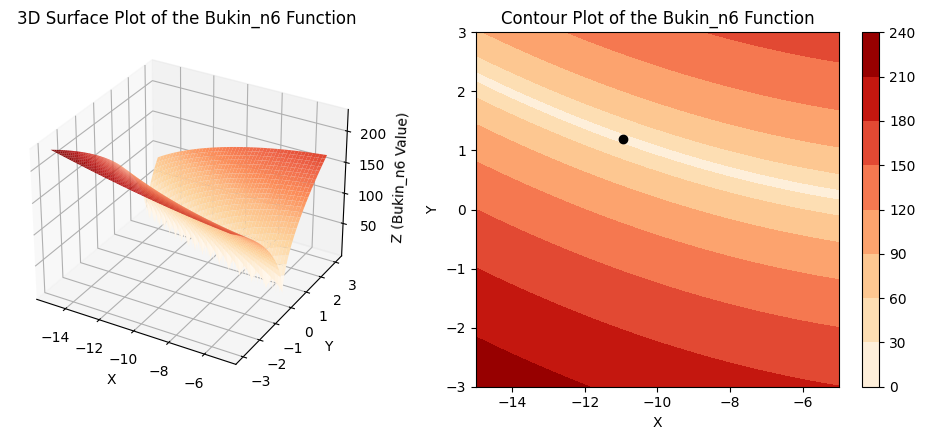

n_gpus: 2
cuda:0


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem 

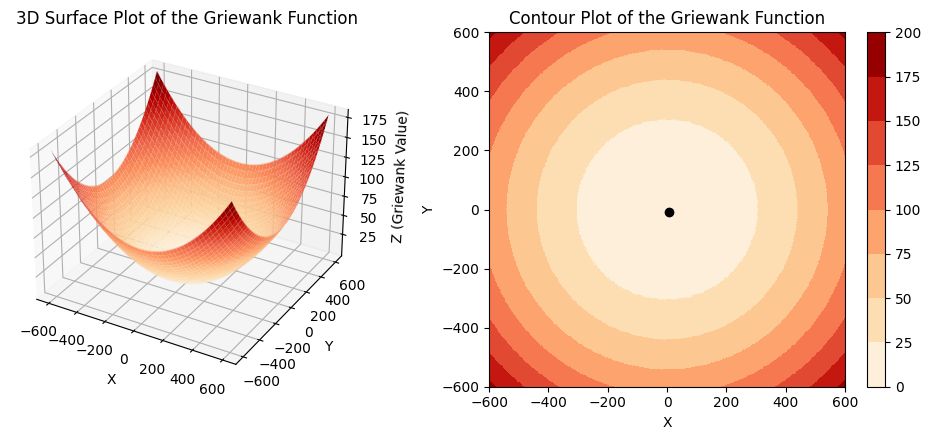

n_gpus: 2
cuda:0


╔═════ QP SOLVER NOTICE ════════════════════════════════════════════════════════════════════════╗
║  PyGRANSO requires a quadratic program (QP) solver that has a quadprog-compatible interface,  ║
║  the default is osqp. Users may provide their own wrapper for the QP solver.                  ║
║  To disable this notice, set opts.quadprog_info_msg = False                                   ║
╚═══════════════════════════════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════════════════════════════╗
PyGRANSO: A PyTorch-enabled port of GRANSO with auto-differentiation                          ║ 
Version 1.2.0                                                                                 ║ 
Licensed under the AGPLv3, Copyright (C) 2021-2022 Tim Mitchell and Buyun Liang               ║ 
══════════════════════════════════════════════════════════════════════════════════════════════╣
Problem 

In [ ]:
# Run all problems
problem_names = [
    # 'ackley',
    'bukin_n6',
    # 'cross_in_tray',
    # 'drop_wave',
    # 'eggholder',
    'griewank',
    # 'holder_table',
    # 'levy',
    # 'levy_n13',
    # 'rastrigin',
    # 'schaffer_n2',
    # 'schaffer_n4',
    'schwefel',
    'shubert',
    # 'ex8_1_1',
    # # 'ex8_6_2',  # Need to fix threw an error
    'kriging_peaks_red010',
    'kriging_peaks_red020',
    'kriging_peaks_red030',
    'kriging_peaks_red050',
    'kriging_peaks_red100',
    'kriging_peaks_red200',
    'kriging_peaks_red500',
    # 'mathopt6',
    # 'quantum',
    # 'rosenbrock',
]

problem_performance = []
trials = 1

for problem_name in problem_names:
    problem = PROBLEMS_BY_NAME[problem_name]
    outputs = run_deeplifting(
        problem,
        trials=trials,
        input_size=768,
        hidden_sizes=(512, 512, 512, 512),
        activation='leaky_relu',
        output_activation='sine',
        agg_function='max',
    )
    results = outputs['final_results']

    # # get the global minimum and the number of hits
    # minimum_value = problem['global_minimum']
    # hit = np.array([np.abs(found_min - minimum_value) for _, _, found_min in results])
    # hits = np.where(hit <= 1e-4, 1, 0).mean()

    # # Create a performance dataframe
    # df = pl.DataFrame(
    #     {
    #         'problem_name': [problem_name] * trials,
    #         'algorithm': ['deeplifting'] * trials,
    #         'hits': hits,
    #     }
    # )
    # problem_performance.append(df)

    # Let's plot the values with UMN colors
    fig = create_optimization_plot(
        problem_name, problem, results, add_contour_plot=True, colormap='OrRd'
    )

In [ ]:
results

In [ ]:
# fig.subplots_adjust(left=0, right=2, bottom=0, top=2)
# fig.savefig(
#     '/Users/ryandevera/data-science/umn_environments/Deeplifting'
#     f'/images/ackley_introduction.png',
#     bbox_inches='tight',
#     pad_inches=-0.1,
# )

In [ ]:
# performance_df = pl.concat(problem_performance, how='vertical')

In [ ]:
# performance_df = (
#     performance_df.groupby(['problem_name'])
#     .agg(pl.col('hits').mean())
#     .rename({'hits': 'success_rate'})
#     .sort('problem_name')
# )

In [ ]:
# performance_df

In [ ]:
# problem_name = 'bukin_n6'
# problem = PROBLEMS_BY_NAME[problem_name]
# problem['bounds'] = [(-10.0001, -9.9999), (1.0001, 0.9999)]
# results = np.array([[-10, 1, 0, 0, 0]])

# create_optimization_plot(
#     problem_name, problem, results, add_contour_plot=True, colormap='OrRd_r'
# )